<a href="https://colab.research.google.com/github/pratham49x/DataScienceSkillcraft/blob/main/t4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



data=pd.read_csv("/content/accident.csv")

# Show the first few rows of the dataset
print(data.head())







  Accident_ID           State        Date      Time                Reason  \
0        1001  Andhra Pradesh  2021-05-01  15:30:00              Speeding   
1        1002       Karnataka  2021-05-02  18:45:00         Drunk Driving   
2        1003           Delhi  2021-05-03  10:15:00  Poor Road Conditions   
3        1004     Maharashtra  2021-05-04  06:00:00        Driver Fatigue   
4        1005   Uttar Pradesh  2021-05-05  21:20:00              Speeding   

   Number_of_Deaths Number_of_Injuries Road_Type Weather_Conditions  \
0                 2                  3     Rural              Sunny   
1                 1                  4     Urban              Rainy   
2                 0                  2     Urban              Foggy   
3                 3                  6     Rural              Sunny   
4                 1                  2     Rural              Sunny   

  Alcohol_Involved Driver_Fatigue Road_Conditions  Speed_Limit  
0               No             No            

In [ ]:
# Data Preprocessing
# Convert date and time columns to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='mixed', errors='coerce')

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time


<ipython-input-5-9bdf889bb411>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='State', palette="viridis")


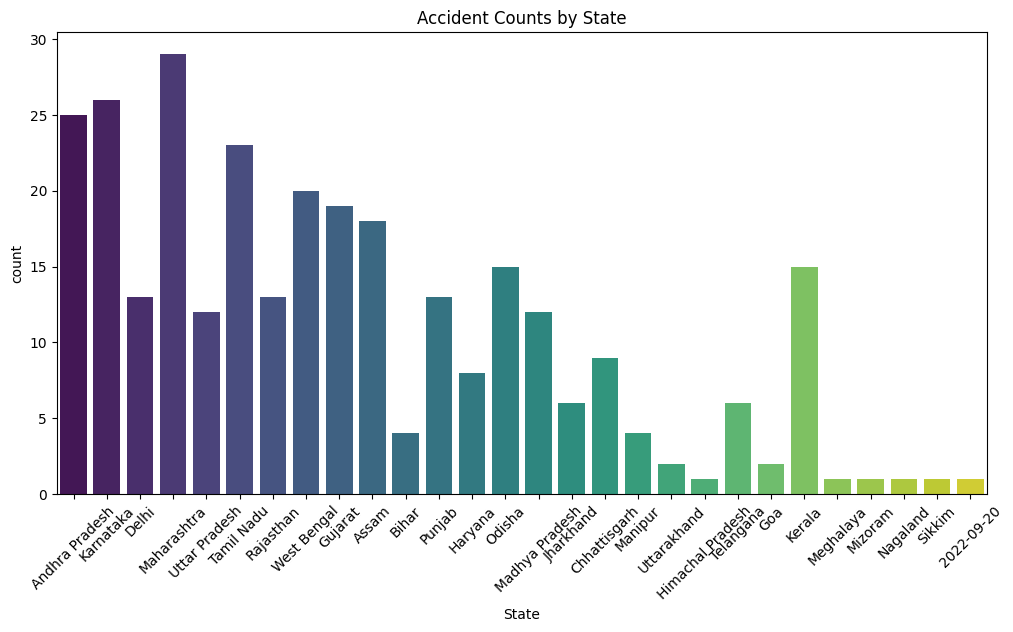

In [ ]:
# Display unique counts for each state
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='State', palette="viridis")
plt.title('Accident Counts by State')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Visualize the frequency of different reasons for accidents using a WordCloud
reasons_text = ' '.join(reason for reason in data['Reason'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reasons_text)

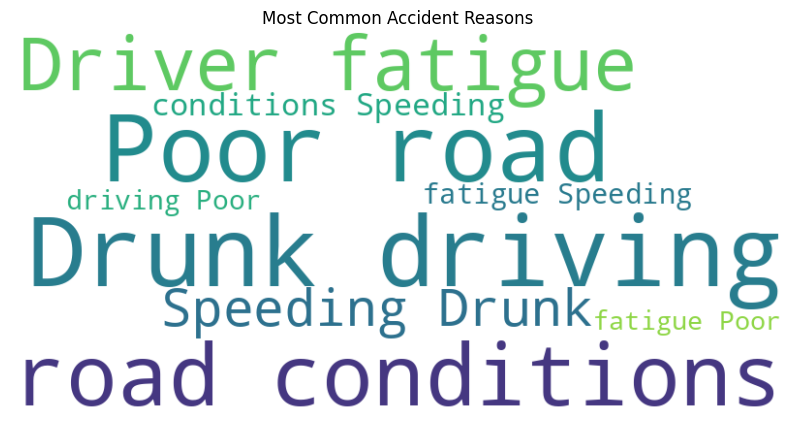

In [ ]:

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Accident Reasons')
plt.show()


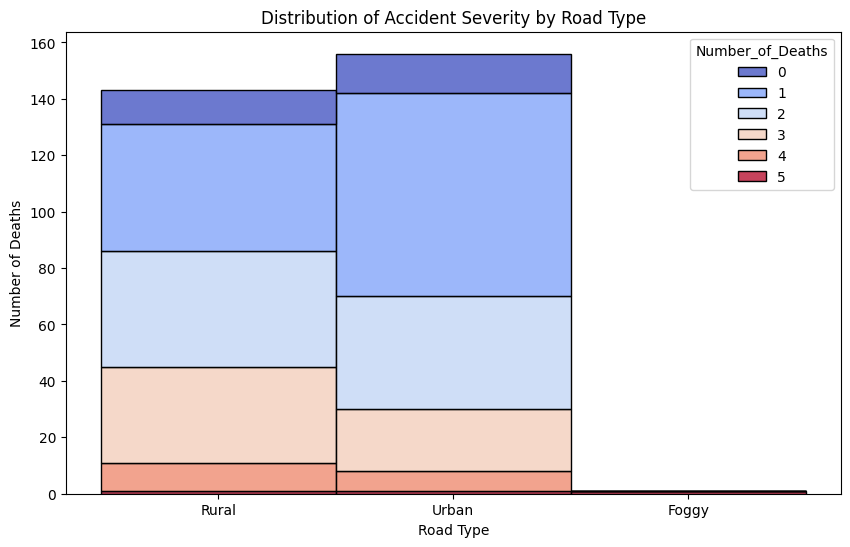

In [ ]:


# Plot the distribution of accident severity by road type
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Road_Type', hue='Number_of_Deaths', multiple='stack', palette='coolwarm')
plt.title('Distribution of Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Deaths')
plt.show()


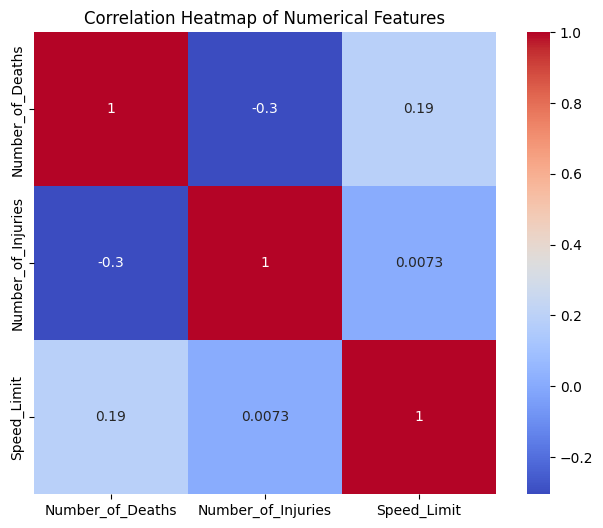

In [ ]:
# Heatmap for correlation between numerical features

# Convert columns to numeric, setting errors='coerce' to turn any non-numeric values into NaN
data['Number_of_Deaths'] = pd.to_numeric(data['Number_of_Deaths'], errors='coerce')
data['Number_of_Injuries'] = pd.to_numeric(data['Number_of_Injuries'], errors='coerce')
data['Speed_Limit'] = pd.to_numeric(data['Speed_Limit'], errors='coerce')

# Drop any rows with NaN values in these columns (optional, depending on your needs)
data.dropna(subset=['Number_of_Deaths', 'Number_of_Injuries', 'Speed_Limit'], inplace=True)

# Now calculate the correlation
plt.figure(figsize=(8, 6))
corr = data[['Number_of_Deaths', 'Number_of_Injuries', 'Speed_Limit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<ipython-input-11-8c1d8ed8e74d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Weather_Conditions', palette='viridis')


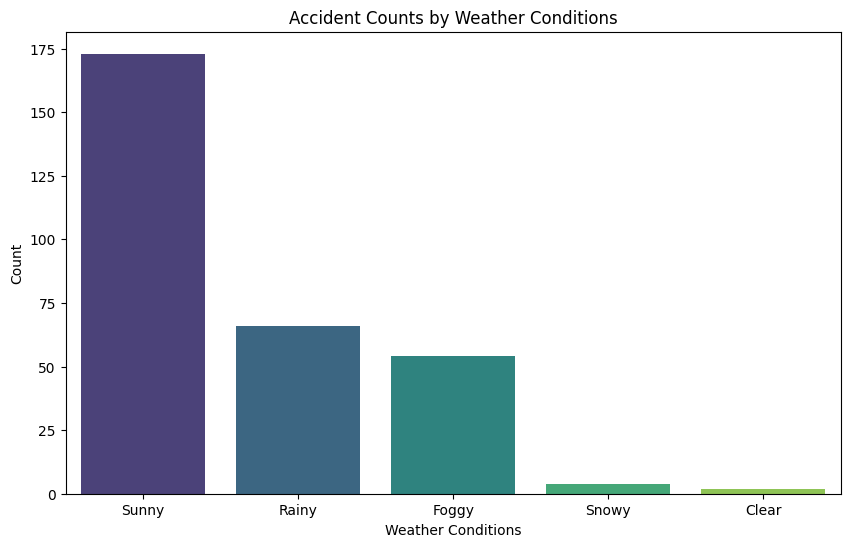

In [ ]:

# Count of accidents by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Conditions', palette='viridis')
plt.title('Accident Counts by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()